http://cookdata.cn/note/view_static_note/9e112cd0d2b8ea872d094369cbb7586f/

# 导入包和数据展示

In [77]:
import numpy as np
import pandas as pd
import sklearn
from plotnine import *
from sklearn import metrics
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

In [2]:
df = pd.read_csv("./train.csv")

In [3]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.battery_power.value_counts()

1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64

In [6]:
df.blue.value_counts()

0    1010
1     990
Name: blue, dtype: int64

In [7]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [8]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [9]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

battery_power：Total energy a battery can store in one time measured in mAh <br>
blue：Has bluetooth or not <br>
clock_speed：speed at which microprocessor executes instructions <br>
dual_sim:Has dual sim support or not <br>
fc:Front Camera mega pixels <br>
four_g:Has 4G or not <br>
int_memory:Internal Memory in Gigabytes <br>
m_dep:Mobile Depth in cm <br>
mobile_wt:Weight of mobile phone <br>
n_cores:Number of cores of processor <br>
pc: <br>
px_height: <br>
px_width: <br>
ram: <br>
sc_h: <br>
sc_w: <br>
talk_time: <br>
three_g: <br>
touch_screen: <br>
wifi: <br>
price_range: <br>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# 数据预处理

In [12]:
#对连续变量用Z-score标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
df_s = pd.DataFrame()
df_s[df.columns] = pd.DataFrame(scaler.fit_transform(df))


01变量的字段

    ['blue','dual_sim','four_g','three_g','touch_screen','wifi']

In [14]:
df.loc[:,['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']]

,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,1,1
1,1,1,1,1,1,0,2
2,1,1,1,1,1,0,2
3,1,0,0,1,0,0,2
4,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...
1995,1,1,1,1,1,0,0
1996,1,1,0,1,1,1,2
1997,0,1,1,1,1,0,3
1998,0,0,1,1,1,1,0


In [15]:
df_s.loc[:,['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']] = df.loc[:,['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']]

In [16]:
df_s

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,0,0.830779,0,-0.762495,0,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,1,1
1,-0.495139,1,-1.253064,1,-0.992890,1,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,0,2
2,-1.537686,1,-1.253064,1,-0.532099,1,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1,1,0,2
3,-1.419319,1,1.198517,0,-0.992890,0,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1,0,0,2
4,1.325906,1,-0.395011,0,2.002254,1,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1,-1.253064,1,-0.992890,1,-1.656260,1.034357,-0.967737,0.646842,...,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,1,1,0,0
1996,1.653694,1,1.321096,1,-0.992890,0,0.383299,-1.046495,1.320993,-0.227564,...,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,1,1,1,2
1997,1.530773,0,-0.762748,1,-0.762495,1,0.217930,0.687548,-0.911225,1.521249,...,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,1,1,0,3
1998,0.622527,0,-0.762748,0,-0.071307,1,0.769162,-1.393304,0.134244,0.209639,...,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,1,1,1,0


In [17]:
pd.unique(df_s["price_range"])

array([1, 2, 3, 0])

In [18]:
## 再次查看数据前5行
df_s.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,0,0.830779,0,-0.762495,0,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,1,1
1,-0.495139,1,-1.253064,1,-0.992890,1,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,0,2
2,-1.537686,1,-1.253064,1,-0.532099,1,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1,1,0,2
3,-1.419319,1,1.198517,0,-0.992890,0,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1,0,0,2
4,1.325906,1,-0.395011,0,2.002254,1,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1,1,0,1


# 划分数据集

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
y = df_s.price_range
del df_s["price_range"]
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [21]:
df_s

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,0,0.830779,0,-0.762495,0,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,1
1,-0.495139,1,-1.253064,1,-0.992890,1,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,0
2,-1.537686,1,-1.253064,1,-0.532099,1,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1,1,0
3,-1.419319,1,1.198517,0,-0.992890,0,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1,0,0
4,1.325906,1,-0.395011,0,2.002254,1,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1,-1.253064,1,-0.992890,1,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,1,1,0
1996,1.653694,1,1.321096,1,-0.992890,0,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,1,1,1
1997,1.530773,0,-0.762748,1,-0.762495,1,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,1,1,0
1998,0.622527,0,-0.762748,0,-0.071307,1,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,1,1,1


In [22]:
x = df_s.copy()
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,0,0.830779,0,-0.762495,0,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,1
1,-0.495139,1,-1.253064,1,-0.992890,1,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,0
2,-1.537686,1,-1.253064,1,-0.532099,1,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1,1,0
3,-1.419319,1,1.198517,0,-0.992890,0,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1,0,0
4,1.325906,1,-0.395011,0,2.002254,1,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1,-1.253064,1,-0.992890,1,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,1,1,0
1996,1.653694,1,1.321096,1,-0.992890,0,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,1,1,1
1997,1.530773,0,-0.762748,1,-0.762495,1,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,1,1,0
1998,0.622527,0,-0.762748,0,-0.071307,1,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,1,1,1


In [23]:
x_train, x_test,\
y_train, y_test \
= train_test_split(x, y, test_size=0.3, random_state=0)

In [24]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1719,-0.923084,1,-1.130485,1,-0.992890,1,-0.278179,-0.699686,0.134244,-0.227564,-1.305750,0.008772,0.089066,-1.418413,1.589078,0.512708,1.462493,1,0,1
1702,0.422213,1,1.688833,1,-0.992890,0,-0.664042,0.340740,1.123201,0.209639,-1.635631,-1.046066,-0.121538,0.492214,0.639453,-1.324131,1.462493,1,0,0
1287,-0.861624,1,-0.272432,1,-0.762495,1,0.934531,0.687548,0.021220,0.646842,0.508594,0.105691,-0.630690,1.608898,0.876859,1.890337,1.645557,1,1,1
482,0.208240,1,-0.272432,1,2.232650,0,-1.601136,-0.699686,-1.617624,0.209639,1.168355,0.754823,0.024265,-1.531833,0.402047,0.053498,-0.002014,0,0,1
768,-0.203771,1,0.830779,0,-0.071307,0,-0.112810,-1.046495,-0.967737,0.646842,-0.810929,2.190575,0.980081,1.503777,1.114266,1.890337,-0.551204,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,-0.033049,1,0.095305,0,1.080671,0,0.052560,1.727974,0.473315,-1.539175,1.333295,-0.277477,-1.593449,1.541584,-0.547577,-0.176107,0.364113,1,1,0
1216,-0.183285,0,-1.007906,1,-0.762495,1,-0.167933,0.687548,-0.487386,-1.101971,1.663176,-0.753055,1.260114,-0.536869,1.114266,0.742313,0.730240,1,0,1
1653,-0.110443,0,0.585621,1,-0.992890,0,0.438422,-1.046495,-1.335064,0.209639,-1.470690,1.699218,0.912965,1.370070,0.164641,0.283103,-0.368140,0,0,1
559,-0.108167,0,1.075937,1,-0.532099,0,-1.049904,1.381165,0.812386,-1.539175,-0.481048,-1.050574,1.299458,-1.010837,0.402047,0.053498,-0.551204,1,1,1


In [25]:
y_train

1719    0
1702    2
1287    3
482     0
768     3
       ..
835     3
1216    1
1653    3
559     0
684     1
Name: price_range, Length: 1400, dtype: int64

In [26]:
print(x_test,y_test)

      battery_power  blue  clock_speed  dual_sim        fc  four_g  \
405        0.490502     1    -1.253064         1 -0.762495       0   
1190      -0.333521     1    -1.253064         1  1.311067       0   
1132       0.649843     1     0.340463         1 -0.992890       0   
731        1.294038     1     0.708200         0 -0.532099       0   
1754      -0.347179     1     0.217884         1 -0.992890       1   
...             ...   ...          ...       ...       ...     ...   
841       -1.658331     0     0.217884         1 -0.301703       0   
108       -0.235640     1     0.585621         1 -0.992890       0   
665        1.098275     1    -1.253064         1 -0.071307       1   
1214      -1.494437     0    -1.253064         0  0.850275       0   
2         -1.537686     1    -1.253064         1 -0.532099       1   

      int_memory     m_dep  mobile_wt   n_cores        pc  px_height  \
405     0.107683  0.687548  -1.617624 -0.227564 -1.140810  -0.890545   
1190   -1.16015

# k近邻

## 模型训练

In [27]:
# knn
from sklearn.neighbors import KNeighborsClassifier
# 交叉验证
from sklearn.model_selection import KFold

knn_model = KNeighborsClassifier(n_neighbors = 150)

kf = KFold(n_splits=3)

X = x_train
Y = y_train
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    knn_model.fit(X_train, Y_train)

test_pred = knn_model.predict(x_test)

TRAIN: [ 467  468  469  470  471  472  473  474  475  476  477  478  479  480
  481  482  483  484  485  486  487  488  489  490  491  492  493  494
  495  496  497  498  499  500  501  502  503  504  505  506  507  508
  509  510  511  512  513  514  515  516  517  518  519  520  521  522
  523  524  525  526  527  528  529  530  531  532  533  534  535  536
  537  538  539  540  541  542  543  544  545  546  547  548  549  550
  551  552  553  554  555  556  557  558  559  560  561  562  563  564
  565  566  567  568  569  570  571  572  573  574  575  576  577  578
  579  580  581  582  583  584  585  586  587  588  589  590  591  592
  593  594  595  596  597  598  599  600  601  602  603  604  605  606
  607  608  609  610  611  612  613  614  615  616  617  618  619  620
  621  622  623  624  625  626  627  628  629  630  631  632  633  634
  635  636  637  638  639  640  641  642  643  644  645  646  647  648
  649  650  651  652  653  654  655  656  657  658  659  660  661  662

klearn.neighbors.KNeighborsClassifier
    类有几个主要的参数，含义如下：
    
        n_neighbors: k
        weights: K个近邻投票权重计算方式
        metric: 距离计算方式

KFold（n_split, shuffle, random_state）

　　参数：
  
        n_split:要划分的折数
        shuffle: 每次都进行shuffle，测试集中折数的总和就是训练集的个数
        random_state:随机状态

In [28]:
test_pred

array([2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 3, 1, 2, 2, 1, 3, 2, 1, 0, 0, 1,
       3, 0, 1, 1, 3, 1, 3, 1, 2, 1, 1, 1, 2, 3, 0, 0, 2, 3, 2, 1, 3, 2,
       2, 2, 0, 1, 2, 1, 1, 2, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 2, 2, 0, 1, 1, 2, 1,
       1, 2, 1, 2, 1, 0, 1, 2, 3, 3, 1, 3, 1, 2, 2, 1, 2, 1, 2, 3, 2, 3,
       2, 0, 1, 1, 3, 2, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3,
       2, 3, 3, 3, 2, 1, 0, 2, 1, 2, 1, 2, 0, 3, 0, 0, 2, 0, 1, 1, 0, 1,
       3, 0, 0, 3, 1, 3, 1, 1, 2, 0, 2, 3, 2, 1, 1, 1, 3, 1, 1, 2, 3, 0,
       1, 2, 3, 1, 2, 1, 0, 1, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 3, 0, 0, 2,
       2, 0, 3, 3, 2, 1, 1, 3, 2, 2, 1, 0, 0, 1, 2, 3, 0, 0, 1, 2, 2, 2,
       2, 3, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 3, 2, 1, 1, 2, 1, 1, 1, 2,
       2, 3, 1, 0, 1, 2, 3, 2, 2, 0, 3, 1, 0, 0, 1, 3, 1, 2, 0, 1, 1, 2,
       3, 1, 2, 3, 1, 1, 1, 3, 3, 1, 2, 3, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0,
       1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 3, 0, 2, 0, 1,

In [29]:
test_pred.shape

(600,)

In [30]:
y_test.shape

(600,)

In [31]:
s = sum(test_pred == y_test)

In [32]:
s

380

In [33]:
test_pred.shape

(600,)

In [34]:
y_test.shape

(600,)

## 模型性能评估

In [35]:
from sklearn import metrics

In [36]:
knn_model.score(x_test,y_test)

0.6333333333333333

In [37]:
print (metrics.classification_report(y_test, test_pred))
print (metrics.confusion_matrix(y_test, test_pred))
print (metrics.accuracy_score(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       151
           1       0.48      0.73      0.58       135
           2       0.49      0.57      0.52       151
           3       0.97      0.53      0.68       163

    accuracy                           0.63       600
   macro avg       0.70      0.64      0.64       600
weighted avg       0.71      0.63      0.64       600

[[109  42   0   0]
 [ 19  99  17   0]
 [  0  62  86   3]
 [  0   3  74  86]]
0.6333333333333333


交叉验证指标:

            1.精确度(accuracy)：分类正确的样本数/总样本数
            2.查准率(precision_weighted)：针对每一个类别，预测正确的样本数比上预测出来的样本数
            3.召回率(recall_weighted)：针对每一个类别，预测正确的样本数比上实际存在的样本数
            4.f1得分(f1_weighted)：2x查准率x召回率/(查准率+召回率)
            在交叉验证过程中，针对每一次交叉验证，计算所有类别的查准率、召回率或者f1得分，然后取各类别相应指标值的平均数，
            作为这一次交叉验证的评估指标，然后再将所有交叉验证的评估指标以数组的形式返回调用者。

## 模型性能提高

https://www.bilibili.com/video/BV1ps411P7sS?p=5&vd_source=e466977515beb5c472268009969a4ea4

### 试不同k取值对模型效果的影响

### 使用cross_val_score交叉验证法来训练

In [39]:
from sklearn.model_selection import cross_val_score

knn_model = KNeighborsClassifier(n_neighbors = 150)
scores = cross_val_score(knn_model,x_train,y_train,cv=5)
scores

array([0.67142857, 0.7       , 0.69285714, 0.62142857, 0.67857143])

In [40]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.06)


# 逻辑回归

## 模型训练

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [45]:
log = LogisticRegression(random_state=111)

scores = cross_val_score(knn_model,x_train,y_train,cv=5)
scores

array([0.67142857, 0.7       , 0.69285714, 0.62142857, 0.67857143])

In [46]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.06)


# 随机森林

## 模型训练

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [76]:
alg = RandomForestClassifier(random_state=111,n_estimators = 100, min_samples_split=4,min_samples_leaf=2)

scores = cross_val_score(alg,x_train,y_train,cv=5)
scores

array([0.83571429, 0.87142857, 0.86785714, 0.87142857, 0.87142857])

In [77]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.03)


In [79]:
alg

RandomForestClassifier(min_samples_leaf=2, min_samples_split=4,
                       random_state=111)

In [81]:
alg.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=4,
                       random_state=111)

In [82]:
pred = alg.predict(x_test)

In [83]:
from sklearn import metrics
print (metrics.classification_report(y_test, pred))
print (metrics.confusion_matrix(y_test, pred))
print (metrics.accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       151
           1       0.79      0.80      0.79       135
           2       0.81      0.73      0.77       151
           3       0.91      0.94      0.92       163

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600

[[147   4   0   0]
 [ 10 108  17   0]
 [  0  25 110  16]
 [  0   0   9 154]]
0.865


# 梯度提升决策树（Gradient Tree Boosting）

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [35]:
alg = GradientBoostingClassifier(random_state=111)

scores = cross_val_score(alg,x_train,y_train,cv=3)
scores

array([0.86509636, 0.86937901, 0.92274678])

In [36]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.89 (+/- 0.05)


In [48]:
alg = GradientBoostingClassifier(random_state=111)
alg.fit(x_train,y_train)

GradientBoostingClassifier(random_state=111)

In [49]:
pred = alg.predict(x_test)

In [50]:
from sklearn import metrics
print (metrics.classification_report(y_test, pred))
print (metrics.confusion_matrix(y_test, pred))
print (metrics.accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       151
           1       0.87      0.87      0.87       135
           2       0.88      0.85      0.86       151
           3       0.93      0.95      0.94       163

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600

[[146   5   0   0]
 [  7 118  10   0]
 [  0  12 128  11]
 [  0   0   8 155]]
0.9116666666666666


## 超参数优化

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
%%capture output
# Time-consuming code here

params={'n_estimators':range(1,150,10),'min_samples_split':range(100,250,10),'min_samples_leaf':range(1,100,5)}
# params={'min_samples_split':range(1,300,20),'min_samples_leaf':range(1,100,10)}
# params={'n_estimators':range(1,100)}

# n_estimators,min_samples_split=300,min_samples_leaf=20,max_depth=8

alg = GradientBoostingClassifier(random_state=111)
# alg = GradientBoostingClassifier(random_state=111,n_estimators=100)
# alg = GradientBoostingClassifier(random_state=111,min_samples_split=181,min_samples_leaf=21)

clf = GridSearchCV(alg,params,cv=3)
clf.fit(x_train,y_train)


In [42]:
clf.best_estimator_,clf.best_params_, clf.best_score_

(GradientBoostingClassifier(min_samples_leaf=71, min_samples_split=160,
                            n_estimators=141, random_state=111),
 {'min_samples_leaf': 71, 'min_samples_split': 160, 'n_estimators': 141},
 0.8978764401883388)

In [43]:
for i in sorted(clf.cv_results_.keys()):
    print("{:15s} :".format(i),clf.cv_results_[i])

mean_fit_time   : [0.00890899 0.08292778 0.15664355 ... 0.77712742 0.84144314 0.90544287]
mean_score_time : [0.00114314 0.00137027 0.00156283 ... 0.00388575 0.00414205 0.00436592]
mean_test_score : [0.75002374 0.7821605  0.81001461 ... 0.89073102 0.89073255 0.89287388]
param_min_samples_leaf : [1 1 1 ... 96 96 96]
param_min_samples_split : [100 100 100 ... 240 240 240]
param_n_estimators : [1 11 21 ... 121 131 141]
params          : [{'min_samples_leaf': 1, 'min_samples_split': 100, 'n_estimators': 1}, {'min_samples_leaf': 1, 'min_samples_split': 100, 'n_estimators': 11}, {'min_samples_leaf': 1, 'min_samples_split': 100, 'n_estimators': 21}, {'min_samples_leaf': 1, 'min_samples_split': 100, 'n_estimators': 31}, {'min_samples_leaf': 1, 'min_samples_split': 100, 'n_estimators': 41}, {'min_samples_leaf': 1, 'min_samples_split': 100, 'n_estimators': 51}, {'min_samples_leaf': 1, 'min_samples_split': 100, 'n_estimators': 61}, {'min_samples_leaf': 1, 'min_samples_split': 100, 'n_estimators': 

In [44]:
output.show()

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=111),
             param_grid={'min_samples_leaf': range(1, 100, 5),
                         'min_samples_split': range(100, 250, 10),
                         'n_estimators': range(1, 150, 10)})

params={'n_estimators':range(1,150,10),'min_samples_split':range(100,250,10),'min_samples_leaf':range(1,100,5)}

(GradientBoostingClassifier(min_samples_leaf=71, min_samples_split=160,
                            n_estimators=141, random_state=111),
 {'min_samples_leaf': 71, 'min_samples_split': 160, 'n_estimators': 141},
 0.8978764401883388)

In [51]:
alg = GradientBoostingClassifier(random_state=111,min_samples_leaf=71, min_samples_split=160,n_estimators=141)
alg.fit(x_train,y_train)

GradientBoostingClassifier(min_samples_leaf=71, min_samples_split=160,
                           n_estimators=141, random_state=111)

In [52]:
pred = alg.predict(x_test)

In [53]:
from sklearn import metrics
print (metrics.classification_report(y_test, pred))
print (metrics.confusion_matrix(y_test, pred))
print (metrics.accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       151
           1       0.91      0.88      0.89       135
           2       0.87      0.87      0.87       151
           3       0.94      0.94      0.94       163

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600

[[148   3   0   0]
 [  7 119   9   0]
 [  0   9 132  10]
 [  0   0  10 153]]
0.92


# 特征工程-特征选择

https://www.jianshu.com/p/9bb700305225

In [78]:
from sklearn.feature_selection import SelectKBest #选择k个分数最高的特征
from sklearn.feature_selection import f_classif



feature_selection.SelectKBest这个可以输入”评分标准“来选出前K个分数最高的特征

F检验，又称ANOVA，方差齐性检验，是用来捕捉每个特征与标签之间的线性关系的过滤方法。它即可以做回归也可以做分类，因此包含feature_selection.f_classif（F检验分类）和feature_selection.f_regression（F检验回归）两个类。它返回F值和p值两个统计量。和卡方过滤一样，选取p值小于0.05或0.01的特征，这些特征与标签时显著线性相关的。


In [79]:
selector = SelectKBest(f_classif, k =5)

In [80]:
selector.fit(x_train,y_train)

SelectKBest(k=5)

In [81]:
scores = -np.log10(selector.pvalues_)
scores

/tmp/ipykernel_578961/686178487.py:1: RuntimeWarning: divide by zero encountered in log10


array([14.99316416,  0.08121914,  0.03865595,  0.09141801,  0.23355071,
        0.50636528,  1.62080942,  0.53054965,  1.75689069,  1.78618045,
        0.25757834,  7.21158504,  8.13442112,         inf,  0.31011223,
        0.19593209,  0.12114321,  0.07421183,  0.85476233,  0.09419363])

In [82]:
len(scores)

20

In [83]:
x_train.shape[1]

20

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

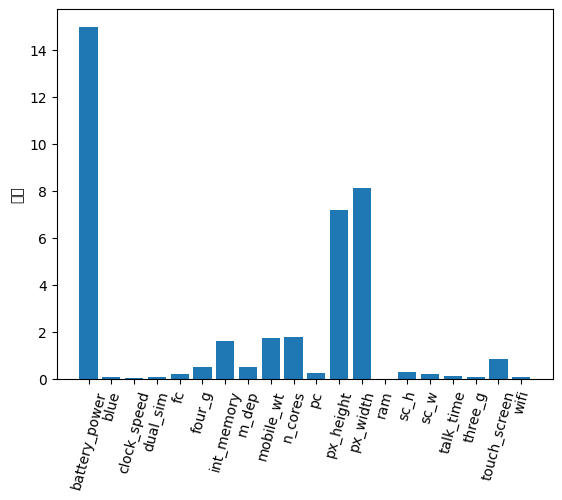

In [85]:
plt.bar(range(x_train.shape[1]),scores)
plt.xticks(range(x_train.shape[1]), x_train.columns , rotation = 'vertical')
plt.xticks(rotation=75)
plt.ylabel('人口')
plt.show()

# 自动超参数优化方法

随机搜索和网格搜索

Random Search & Grid Search

## GridSearch 穷举网格超参数优化

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [70]:
params={'n_estimators':[10,2000],"min_samples_split":[1,10],"min_samples_leaf":[1,10]}


alg = RandomForestClassifier(random_state=111)

clf = GridSearchCV(alg,params)
clf.fit(x_train,y_train)

# scores = cross_val_score(alg,x_train,y_train,cv=5)
# scores

/home/yyds/.conda/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/yyds/.conda/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/yyds/.conda/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/home/yyds/.conda/envs/myenv/lib/python3.9/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

GridSearchCV(estimator=RandomForestClassifier(random_state=111),
             param_grid={'min_samples_leaf': [1, 10],
                         'min_samples_split': [1, 10],
                         'n_estimators': [10, 2000]})

In [71]:
for i in sorted(clf.cv_results_.keys()):
    print("{:15s} :".format(i),clf.cv_results_[i])

mean_fit_time   : [0.01126652 0.34549632 0.01585703 2.93119469 0.00364347 0.34423785
 0.0140152  2.56422729]
mean_score_time : [0.         0.         0.00185862 0.16306372 0.         0.
 0.00180945 0.15535326]
mean_test_score : [       nan        nan 0.81285714 0.87214286        nan        nan
 0.81642857 0.85571429]
param_min_samples_leaf : [1 1 1 1 10 10 10 10]
param_min_samples_split : [1 1 10 10 1 1 10 10]
param_n_estimators : [10 2000 10 2000 10 2000 10 2000]
params          : [{'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 10}, {'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 2000}, {'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}, {'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 2000}, {'min_samples_leaf': 10, 'min_samples_split': 1, 'n_estimators': 10}, {'min_samples_leaf': 10, 'min_samples_split': 1, 'n_estimators': 2000}, {'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 10}, {'min_samples_lea

In [72]:
clf.best_estimator_

RandomForestClassifier(min_samples_split=10, n_estimators=2000,
                       random_state=111)

In [73]:
clf.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 2000}

## 参数优化后训练

In [37]:
alg = RandomForestClassifier(random_state=111,n_estimators = 2000, min_samples_split=10,min_samples_leaf=1)

scores = cross_val_score(alg,x_train,y_train,cv=3)
scores

array([0.86723769, 0.85224839, 0.87982833])

In [38]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.02)


## Random Search 随机搜索

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [33]:
params={'n_estimators':[10,2000],"min_samples_split":[1,10],"min_samples_leaf":[1,10]}


alg = RandomForestClassifier(random_state=111)

clf = RandomizedSearchCV(alg,params,n_iter=100, cv=3, scoring="r2", n_jobs=-1)
clf.fit(x_train,y_train)

/home/yyds/.conda/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
/home/yyds/.conda/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/home/yyds/.conda/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/yyds/.conda/envs/myenv/lib/python

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=111),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 10],
                                        'min_samples_split': [1, 10],
                                        'n_estimators': [10, 2000]},
                   scoring='r2')

In [34]:
for i in sorted(clf.cv_results_.keys()):
    print("{:15s} :".format(i),clf.cv_results_[i])

mean_fit_time   : [0.00654252 0.37029791 0.01876664 2.90350183 0.0044926  0.37396479
 0.01439214 2.54875509]
mean_score_time : [0.         0.         0.00248138 0.19776392 0.         0.
 0.00230249 0.1788733 ]
mean_test_score : [       nan        nan 0.85359062 0.8913616         nan        nan
 0.84082186 0.8820716 ]
param_min_samples_leaf : [1 1 1 1 10 10 10 10]
param_min_samples_split : [1 1 10 10 1 1 10 10]
param_n_estimators : [10 2000 10 2000 10 2000 10 2000]
params          : [{'n_estimators': 10, 'min_samples_split': 1, 'min_samples_leaf': 1}, {'n_estimators': 2000, 'min_samples_split': 1, 'min_samples_leaf': 1}, {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 1}, {'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 1}, {'n_estimators': 10, 'min_samples_split': 1, 'min_samples_leaf': 10}, {'n_estimators': 2000, 'min_samples_split': 1, 'min_samples_leaf': 10}, {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 10}, {'n_estimators': 

In [35]:
clf.best_estimator_

RandomForestClassifier(min_samples_split=10, n_estimators=2000,
                       random_state=111)

In [36]:
clf.best_params_

{'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 1}

# 集成多种算法

弱分类器集合 形成强分类器

耍赖的路子

集成学习（ensemble learning）是时下非常流行的机器学习算法，它本身不是一个单独的机器学习算法，而是通过在数据上构建多个模型，集成所有模型的建模结果。

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


# k-means聚类

In [13]:
#K-means聚类
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4,random_state=111).fit(df_s)    #为使复现效果与PPT效果相同，设置随机种子为111

In [14]:
#样本标签和簇质心
df_label = model.labels_
df_cluster = model.cluster_centers_
df_label

array([1, 0, 0, ..., 0, 3, 0], dtype=int32)

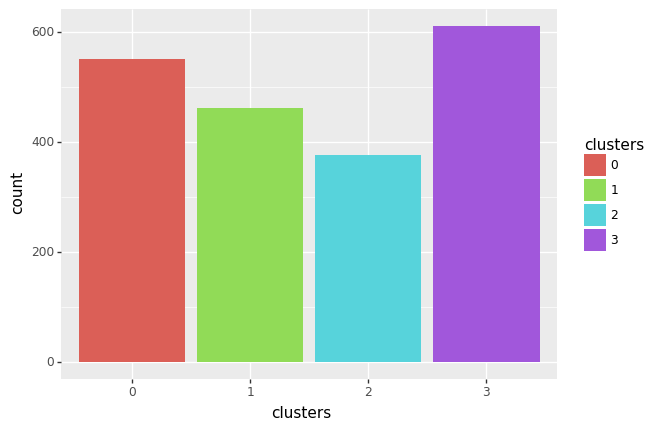

<ggplot: (8734185823278)>

In [15]:
#画每个簇样本数的柱状图
df_label_dataframe = pd.DataFrame({'clusters':df_label})
df_label_dataframe['clusters'] = df_label_dataframe['clusters'].astype('category')

ggplot(df_label_dataframe,aes('clusters',fill='clusters')) + geom_bar()

In [18]:
col = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g','int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi', 'price_range']

In [24]:
#找出簇质心连续性变量的坐标
centroid_cluster = pd.DataFrame(df_cluster).copy()
centroid_cluster.columns=col

#将数据逆标准化，转换为原始数据
centroid_cluster_inversescale = pd.DataFrame(scaler.inverse_transform(centroid_cluster))
centroid_cluster_inversescale.columns=col
centroid_cluster_inversescale.applymap(lambda x:'%.2f'%x)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1310.57,0.48,1.45,0.52,2.25,0.69,33.83,0.49,138.75,4.59,...,691.75,1317.51,3072.58,12.47,6.25,10.75,1.00,0.47,0.51,4.36
1,1225.28,0.52,1.57,0.52,3.97,-0.00,32.41,0.51,139.93,4.59,...,666.64,1246.61,2067.36,12.20,5.53,11.44,0.00,0.50,0.50,3.09
2,1272.12,0.51,1.62,0.47,10.47,0.60,29.26,0.51,143.64,4.39,...,633.17,1221.37,2344.34,11.88,5.29,11.57,0.96,0.52,0.54,3.46
3,1162.70,0.48,1.49,0.52,2.62,0.71,31.88,0.50,139.75,4.49,...,594.05,1214.24,1174.59,12.50,5.81,10.58,1.00,0.53,0.48,2.00


In [28]:
# 轮廓系数评估聚类效果
labels = model.labels_
print("轮廓系数(Silhouette Coefficient): %0.4f"
      % metrics.silhouette_score(df_s, labels))

轮廓系数(Silhouette Coefficient): 0.0645


In [30]:
# 选择不同k值比较聚类效果
for i in [2,4,6]:
    model = KMeans(n_clusters=i,random_state=111).fit(df_s)   #为使复现效果与PPT效果相同，设置随机种子为111
    labels = model.labels_
    print("轮廓系数(Silhouette Coefficient): %0.4f"% metrics.silhouette_score(df_s, labels))

轮廓系数(Silhouette Coefficient): 0.0778
轮廓系数(Silhouette Coefficient): 0.0645
轮廓系数(Silhouette Coefficient): 0.0597
